## CNN을 활용한 동물 이미지 분류

### 데이터 불러오기

In [1]:
import shutil, os
import pandas as pd

labels = pd.read_csv("animal_data_img.csv")

In [2]:
len(labels)

11959

### 데이터 전처리

In [3]:
# 동물 이름 칼럼 삭제
labels = labels.drop(columns='Label')

In [4]:
# 사진이 있는 파일만 남겨둠
labels = labels.iloc[284:,]

In [5]:
# 동물 label 별로 dataframe sorting
labels = labels.sort_values('Animal_Type')

In [6]:
# 글자 깨짐 있는 사진 삭제
labels = labels[~labels['Image_File'].str.contains("à", na=False, case=False)]
labels = labels[~labels['Image_File'].str.contains("Â", na=False, case=False)]
labels = labels[~labels['Image_File'].str.contains("ð", na=False, case=False)]
labels = labels[~labels['Image_File'].str.contains("Ã", na=False, case=False)]

In [7]:
len(labels)

11093

In [8]:
# class 추출
class_names = list(labels.Animal_Type.unique())
class_names

['Bird', 'Cat', 'Dog', 'Fish', 'Guinea pig / mouse', 'Other', 'Rabbit']

In [9]:
# class 이름에 '/'가 포함되어있기 때문에 directory 불러오는 것에 오류가 생겨 수정
labels['Animal_Type'] = labels['Animal_Type'].str.replace('Guinea pig / mouse', 'Guinea pig and mouse')

In [10]:
# 변경된 class 이름
class_names = list(labels.Animal_Type.unique())
class_names

['Bird', 'Cat', 'Dog', 'Fish', 'Guinea pig and mouse', 'Other', 'Rabbit']

### 시각화

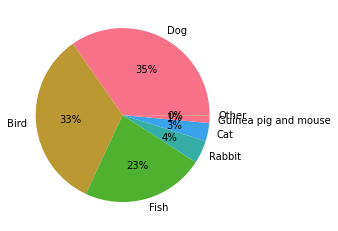

In [30]:
import seaborn as sns
animal_type = labels[["Image_File", "Animal_Type"]].groupby("Animal_Type").agg(['count'])['Image_File']['count'].sort_values(ascending=False)[:10]

colors = sns.color_palette('husl')[0:5]
plt.pie(animal_type, labels = animal_type.index, colors = colors, autopct='%.0f%%')
plt.show()

### class 별 사진 저장 및 디렉토리 생성

In [57]:
# 디렉토리 생성
train_images = '/animal_images'
train_cat = '/cat_images_'

for i in class_names:
    os.makedirs(os.path.join('cat_images_', i))

In [185]:
# 사진 각 폴더에 옮기기
for c in class_names: 
    for i in list(labels[labels['Animal_Type']==c]['Image_File']):
        get_image = os.path.join('animal_images', i) 
        move_image_to_cat = shutil.move(get_image, 'cat_images_/'+c)

### train/val/test 디렉토리 생성

In [203]:
original_dataset_dir = "cat_images_/" 
base_dir = 'train_val_test' 
if os.path.exists(base_dir): 
    shutil.rmtree(base_dir) 
    
os.mkdir(base_dir) 
train_dir = os.path.join(base_dir, 'train') 
os.mkdir(train_dir) 
validation_dir = os.path.join(base_dir, 'validation') 
os.mkdir(validation_dir) 
test_dir = os.path.join(base_dir, 'test') 
os.mkdir(test_dir) 

train_bird_dir = os.path.join(train_dir, 'Bird') 
os.mkdir(train_bird_dir) 
train_cat_dir = os.path.join(train_dir, 'Cat') 
os.mkdir(train_cat_dir)
train_dog_dir = os.path.join(train_dir, 'Dog') 
os.mkdir(train_dog_dir) 
train_fish_dir = os.path.join(train_dir, 'Fish') 
os.mkdir(train_fish_dir)
train_guinea_dir = os.path.join(train_dir, 'Guinea pig and mouse') 
os.mkdir(train_guinea_dir) 
train_rabbit_dir = os.path.join(train_dir, 'Rabbit') 
os.mkdir(train_rabbit_dir)

validation_bird_dir = os.path.join(validation_dir, 'Bird') 
os.mkdir(validation_bird_dir) 
validation_cat_dir = os.path.join(validation_dir, 'Cat') 
os.mkdir(validation_cat_dir)
validation_dog_dir = os.path.join(validation_dir, 'Dog') 
os.mkdir(validation_dog_dir) 
validation_fish_dir = os.path.join(validation_dir, 'Fish') 
os.mkdir(validation_fish_dir)
validation_guinea_dir = os.path.join(validation_dir, 'Guinea pig and mouse') 
os.mkdir(validation_guinea_dir) 
validation_rabbit_dir = os.path.join(validation_dir, 'Rabbit') 
os.mkdir(validation_rabbit_dir)

test_bird_dir = os.path.join(test_dir, 'Bird') 
os.mkdir(test_bird_dir) 
test_cat_dir = os.path.join(test_dir, 'Cat') 
os.mkdir(test_cat_dir)
test_dog_dir = os.path.join(test_dir, 'Dog') 
os.mkdir(test_dog_dir) 
test_fish_dir = os.path.join(test_dir, 'Fish') 
os.mkdir(test_fish_dir)
test_guinea_dir = os.path.join(test_dir, 'Guinea pig and mouse') 
os.mkdir(test_guinea_dir) 
test_rabbit_dir = os.path.join(test_dir, 'Rabbit') 
os.mkdir(test_rabbit_dir)

### train/val/test set split

In [11]:
labels['Image_File_1'] = labels['Image_File'].str.replace('animal_images/', '')
labels.head()

,Animal_Type,Image_File,Image_File_1
284,Bird,animal_images/1633802962453_Racing Homer Pigeo...,1633802962453_Racing Homer Pigeon for sale.jpg
5764,Bird,animal_images/1633809259952_Chocolate Konda Pi...,1633809259952_Chocolate Konda Pigeons for sale...
5753,Bird,animal_images/1633809203618_Shamo Rooster for ...,1633809203618_Shamo Rooster for sale.jpg
5752,Bird,animal_images/1633809203431_Pigeons for sale.jpg,1633809203431_Pigeons for sale.jpg
5751,Bird,animal_images/1633809203234_Parrot Nose Rooste...,1633809203234_Parrot Nose Rooster for sale.jpg


#### bird

In [205]:
fnames = labels[labels['Animal_Type']=='Bird']['Image_File_1'][:2500]
for fname in fnames: 
    src = os.path.join(original_dataset_dir+'/Bird', fname) 
    dst = os.path.join(train_bird_dir, fname) 
    shutil.copyfile(src, dst)

fnames = labels[labels['Animal_Type']=='Bird']['Image_File_1'][2500:3100]
for fname in fnames: 
    src = os.path.join(original_dataset_dir+'/Bird', fname) 
    dst = os.path.join(validation_bird_dir, fname) 
    shutil.copyfile(src, dst)
    
fnames = labels[labels['Animal_Type']=='Bird']['Image_File_1'][3100:] 
for fname in fnames: 
    src = os.path.join(original_dataset_dir+'/Bird', fname) 
    dst = os.path.join(test_bird_dir, fname) 
    shutil.copyfile(src, dst)

#### cat

In [236]:
fnames = labels[labels['Animal_Type']=='Cat']['Image_File_1'][:300]
for fname in fnames: 
    src = os.path.join(original_dataset_dir+'/Cat', fname) 
    dst = os.path.join(train_cat_dir, fname) 
    shutil.copyfile(src, dst)

fnames = labels[labels['Animal_Type']=='Cat']['Image_File_1'][300:340]
for fname in fnames: 
    src = os.path.join(original_dataset_dir+'/Cat', fname) 
    dst = os.path.join(validation_cat_dir, fname) 
    shutil.copyfile(src, dst)
    
fnames = labels[labels['Animal_Type']=='Cat']['Image_File_1'][340:]
for fname in fnames: 
    src = os.path.join(original_dataset_dir+'/Cat', fname) 
    dst = os.path.join(test_cat_dir, fname) 
    shutil.copyfile(src, dst)

####  dog

In [207]:
fnames = labels[labels['Animal_Type']=='Dog']['Image_File_1'][:3000]
for fname in fnames: 
    src = os.path.join(original_dataset_dir+'/Dog', fname) 
    dst = os.path.join(train_dog_dir, fname) 
    shutil.copyfile(src, dst)
    
fnames = labels[labels['Animal_Type']=='Dog']['Image_File_1'][3000:3450]
for fname in fnames: 
    src = os.path.join(original_dataset_dir+'/Dog', fname) 
    dst = os.path.join(validation_dog_dir, fname) 
    shutil.copyfile(src, dst)
    
fnames = labels[labels['Animal_Type']=='Dog']['Image_File_1'][3450:]
for fname in fnames: 
    src = os.path.join(original_dataset_dir+'/Dog', fname) 
    dst = os.path.join(test_dog_dir, fname) 
    shutil.copyfile(src, dst)

#### fish

In [42]:
fnames = labels[labels['Animal_Type']=='Fish']['Image_File_1'][:2000] 
for fname in fnames: 
    src = os.path.join(original_dataset_dir+'/Fish', fname) 
    dst = os.path.join(train_fish_dir, fname) 
    shutil.copyfile(src, dst)

fnames = labels[labels['Animal_Type']=='Fish']['Image_File_1'][2000:2270]
for fname in fnames: 
    src = os.path.join(original_dataset_dir+'/Fish', fname) 
    dst = os.path.join(validation_fish_dir, fname) 
    shutil.copyfile(src, dst)
    
fnames = labels[labels['Animal_Type']=='Fish']['Image_File_1'][2270:]
for fname in fnames: 
    src = os.path.join(original_dataset_dir+'/Fish', fname) 
    dst = os.path.join(test_fish_dir, fname) 
    shutil.copyfile(src, dst)

#### rabbit

In [211]:
fnames = labels[labels['Animal_Type']=='Rabbit']['Image_File_1'][:400]
for fname in fnames: 
    src = os.path.join(original_dataset_dir+'/Rabbit', fname) 
    dst = os.path.join(train_rabbit_dir, fname) 
    shutil.copyfile(src, dst)

fnames = labels[labels['Animal_Type']=='Rabbit']['Image_File_1'][400:440]
for fname in fnames: 
    src = os.path.join(original_dataset_dir+'/Rabbit', fname) 
    dst = os.path.join(validation_rabbit_dir, fname) 
    shutil.copyfile(src, dst)
    
fnames = labels[labels['Animal_Type']=='Rabbit']['Image_File_1'][440:]
for fname in fnames: 
    src = os.path.join(original_dataset_dir+'/Rabbit', fname) 
    dst = os.path.join(test_rabbit_dir, fname) 
    shutil.copyfile(src, dst)    

### 모델링

### model1: 비교적 간단한 모델

In [12]:
from tensorflow.keras import layers 
from tensorflow.keras import models 
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='softmax')) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dropout (Dropout)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               89719296  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 89,720,705
Trainable params: 89,720,705
Non-trainable params: 0
____________________________________________

In [13]:
from tensorflow.keras import optimizers 

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255) 

In [15]:
base_dir = 'train_val_test' 
train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation') 
test_dir = os.path.join(base_dir, 'test') 

In [16]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), 
                                                    batch_size=50, class_mode='categorical')

Found 8200 images belonging to 6 classes.


In [17]:
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), 
                                                    batch_size=50, class_mode='categorical')

Found 1400 images belonging to 6 classes.


In [19]:
history = model.fit_generator( 
    train_generator, 
    steps_per_epoch=164,   # 164 * batch size 50 = 8200
    epochs=30, 
    validation_data=validation_generator, 
    validation_steps=28)  # 28 * batch size 50 = 1400

Epoch 1/30
164/164 [==============================] - 265s 2s/step - loss: 1.2917 - accuracy: 0.8412 - val_loss: 1.2995 - val_accuracy: 0.8307
Epoch 2/30
164/164 [==============================] - 245s 1s/step - loss: 1.1902 - accuracy: 0.8535 - val_loss: 1.1234 - val_accuracy: 0.8585
Epoch 3/30
164/164 [==============================] - 263s 2s/step - loss: 1.1224 - accuracy: 0.8635 - val_loss: 1.0228 - val_accuracy: 0.8702
Epoch 4/30
164/164 [==============================] - 269s 2s/step - loss: 1.0647 - accuracy: 0.8719 - val_loss: 0.9937 - val_accuracy: 0.8773
Epoch 5/30
164/164 [==============================] - 269s 2s/step - loss: 1.0112 - accuracy: 0.8803 - val_loss: 0.9564 - val_accuracy: 0.8875
Epoch 6/30
164/164 [==============================] - 292s 2s/step - loss: 0.9603 - accuracy: 0.8878 - val_loss: 0.9607 - val_accuracy: 0.8864
Epoch 7/30
164/164 [==============================] - 253s 2s/step - loss: 0.9024 - accuracy: 0.8947 - val_loss: 0.9614 - val_accuracy: 0.8798

In [21]:
model.save('animals_0.h5')

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

In [22]:
epochs = range(len(acc))

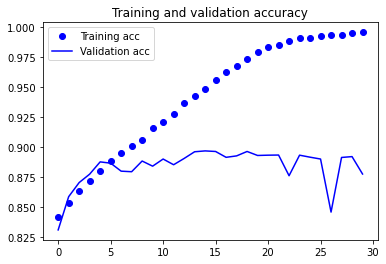

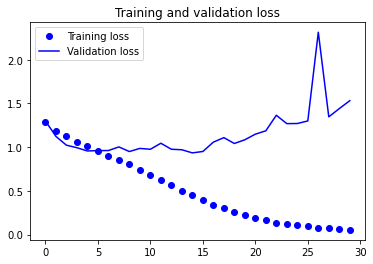

In [23]:
import matplotlib.pyplot as plt
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.show()

In [24]:
test_generator = test_datagen.flow_from_directory(test_dir,
 target_size=(150, 150), batch_size=50, class_mode='categorical')

Found 1330 images belonging to 6 classes.


In [25]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=26)
print('test acc:', test_acc)

Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8820512294769287


### model2: 비교적 복잡한 모델

In [47]:
from tensorflow.keras import layers 
from tensorflow.keras import models 
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='softmax')) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [48]:
from tensorflow.keras import optimizers 
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.Adam(lr=1e-4), metrics=['accuracy'])

In [159]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255) 
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), 
                                                    batch_size=50, class_mode='categorical')

Found 8200 images belonging to 6 classes.


In [160]:
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), 
                                                    batch_size=50, class_mode='categorical')

Found 1400 images belonging to 6 classes.


In [56]:
for data_batch, labels_batch in train_generator: 
    print(data_batch.shape) 
    print(labels_batch.shape)
    break

(50, 150, 150, 3)
(50, 6)


In [57]:
for data_batch, labels_batch in validation_generator: 
    print(data_batch.shape) 
    print(labels_batch.shape)
    break

(50, 150, 150, 3)
(50, 6)


In [58]:
history = model.fit_generator( 
    train_generator, 
    steps_per_epoch=164,   # 164 * batch size 50 = 8200
    epochs=30, 
    validation_data=validation_generator, 
    validation_steps=28)  # 28 * batch size 50 = 1400

Epoch 1/30
164/164 [==============================] - 272s 2s/step - loss: 1.3602 - accuracy: 0.8337 - val_loss: 1.2773 - val_accuracy: 0.8333
Epoch 2/30
164/164 [==============================] - 330s 2s/step - loss: 1.2894 - accuracy: 0.8402 - val_loss: 1.2064 - val_accuracy: 0.8395
Epoch 3/30
164/164 [==============================] - 298s 2s/step - loss: 1.1986 - accuracy: 0.8541 - val_loss: 1.1663 - val_accuracy: 0.8410
Epoch 4/30
164/164 [==============================] - 286s 2s/step - loss: 1.1315 - accuracy: 0.8621 - val_loss: 1.0173 - val_accuracy: 0.8763
Epoch 5/30
164/164 [==============================] - 259s 2s/step - loss: 1.0831 - accuracy: 0.8693 - val_loss: 1.1815 - val_accuracy: 0.8470
Epoch 6/30
164/164 [==============================] - 262s 2s/step - loss: 1.0447 - accuracy: 0.8767 - val_loss: 0.9862 - val_accuracy: 0.8825
Epoch 7/30
164/164 [==============================] - 288s 2s/step - loss: 1.0174 - accuracy: 0.8798 - val_loss: 0.9554 - val_accuracy: 0.8867

In [59]:
model.save('animals_1.h5')

In [61]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [62]:
import matplotlib.pyplot as plt

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

In [63]:
epochs = range(len(acc))

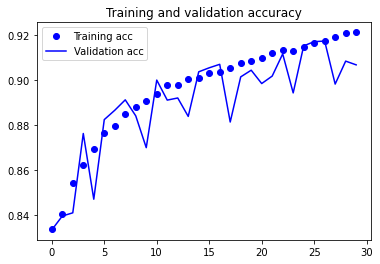

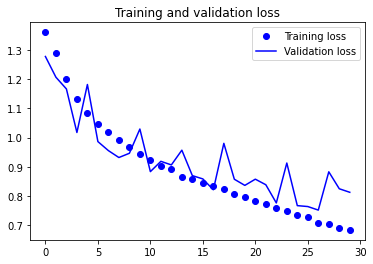

In [68]:
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.show()

### model 3: 옵티마이저 변경(RMSprop)

In [13]:
from tensorflow.keras import layers 
from tensorflow.keras import models 
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='softmax')) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [42]:
from tensorflow.keras import optimizers 

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255) 

In [44]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), 
                                                    batch_size=50, class_mode='categorical')

Found 8200 images belonging to 6 classes.


In [45]:
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), 
                                                    batch_size=50, class_mode='categorical')

Found 1400 images belonging to 6 classes.


In [50]:
from tensorflow.keras import callbacks
my_callbacks = [
    callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
]

In [52]:
history = model.fit( 
    train_generator,
    steps_per_epoch=164,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=28,
    callbacks=my_callbacks)

Epoch 1/30
164/164 [==============================] - 251s 2s/step - loss: 1.2980 - accuracy: 0.8364 - val_loss: 1.1858 - val_accuracy: 0.8412
Epoch 2/30
164/164 [==============================] - 254s 2s/step - loss: 1.1844 - accuracy: 0.8492 - val_loss: 1.0968 - val_accuracy: 0.8554
Epoch 3/30
164/164 [==============================] - 255s 2s/step - loss: 1.1155 - accuracy: 0.8640 - val_loss: 1.0284 - val_accuracy: 0.8720
Epoch 4/30
164/164 [==============================] - 256s 2s/step - loss: 1.0550 - accuracy: 0.8765 - val_loss: 1.0899 - val_accuracy: 0.8632
Epoch 5/30
164/164 [==============================] - 281s 2s/step - loss: 1.0168 - accuracy: 0.8817 - val_loss: 0.9458 - val_accuracy: 0.8880
Epoch 6/30
164/164 [==============================] - 272s 2s/step - loss: 0.9890 - accuracy: 0.8857 - val_loss: 0.9186 - val_accuracy: 0.8912
Epoch 7/30
164/164 [==============================] - 258s 2s/step - loss: 0.9665 - accuracy: 0.8898 - val_loss: 0.8939 - val_accuracy: 0.8986

In [53]:
model.save('animals_2.h5')

In [55]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

In [56]:
epochs = range(len(acc))

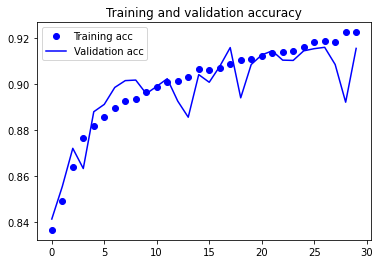

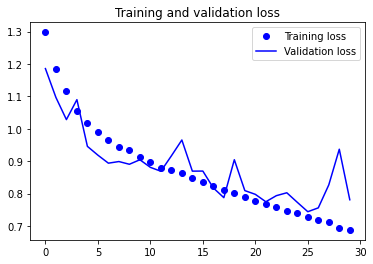

In [59]:
import matplotlib.pyplot as plt
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.show()

### model 4: 이미지 데이터 보강 기법 활용

In [60]:
from tensorflow.keras import layers 
from tensorflow.keras import models 
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='softmax')) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [69]:
from tensorflow.keras import optimizers 

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

In [21]:
train_datagen = ImageDataGenerator( 
    rescale=1./255, 
    rotation_range=90,
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) 

In [17]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), 
                                                    batch_size=100, class_mode='categorical')

Found 8200 images belonging to 6 classes.


In [18]:
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), 
                                                    batch_size=50, class_mode='categorical')

Found 1400 images belonging to 6 classes.


In [65]:
import shutil, os
import pandas as pd

original_dataset_dir = "cat_images_/" 
base_dir = 'train_val_test'
train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation') 
test_dir = os.path.join(base_dir, 'test') 

In [66]:
train_dog_dir = os.path.join(train_dir, 'Dog') 
validation_dog_dir = os.path.join(validation_dir, 'Dog') 
test_dog_dir = os.path.join(test_dir, 'Dog') 

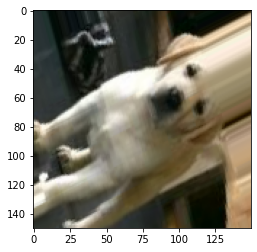

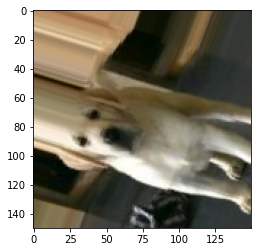

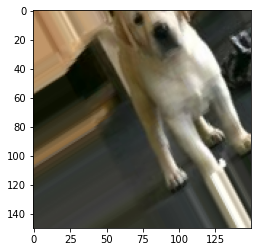

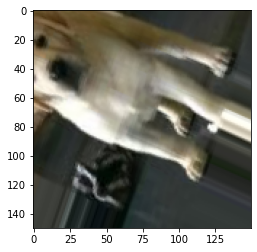

In [70]:
from tensorflow.keras.preprocessing import image

fnames = sorted([os.path.join(train_dog_dir, fname) for fname in os.listdir(train_dog_dir)])

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img) 
x = x.reshape((1,) + x.shape)

i = 0 
for batch in train_datagen.flow(x, batch_size=1): 
    plt.figure(i) 
    imgplot = plt.imshow(image.array_to_img(batch[0])) 
    i += 1 
    if i % 4 == 0: 
        break
plt.show()

In [85]:
history = model.fit( 
    train_generator,
    steps_per_epoch=82,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=28,
    callbacks=my_callbacks)

Epoch 1/30
82/82 [==============================] - 237s 3s/step - loss: 1.3609 - accuracy: 0.8334 - val_loss: 1.2816 - val_accuracy: 0.8333
Epoch 2/30
82/82 [==============================] - 250s 3s/step - loss: 1.3452 - accuracy: 0.8332 - val_loss: 1.2767 - val_accuracy: 0.8333
Epoch 3/30
82/82 [==============================] - 242s 3s/step - loss: 1.3158 - accuracy: 0.8350 - val_loss: 1.1911 - val_accuracy: 0.8377
Epoch 4/30
82/82 [==============================] - 242s 3s/step - loss: 1.2655 - accuracy: 0.8418 - val_loss: 1.2002 - val_accuracy: 0.8424
Epoch 5/30
82/82 [==============================] - 241s 3s/step - loss: 1.2461 - accuracy: 0.8443 - val_loss: 1.1989 - val_accuracy: 0.8299
Epoch 6/30
82/82 [==============================] - 300s 4s/step - loss: 1.2165 - accuracy: 0.8490 - val_loss: 1.1296 - val_accuracy: 0.8473
Epoch 7/30
82/82 [==============================] - 275s 3s/step - loss: 1.1985 - accuracy: 0.8510 - val_loss: 1.0652 - val_accuracy: 0.8665
Epoch 8/30
82

In [86]:
model.save('animals_3.h5')

In [87]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

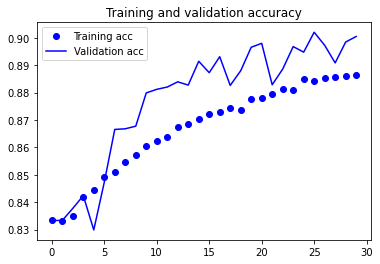

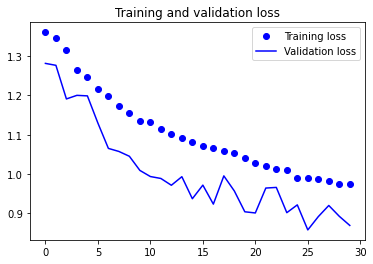

In [88]:
epochs = range(len(acc))

import matplotlib.pyplot as plt
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.show()

In [89]:
test_generator = test_datagen.flow_from_directory(test_dir,
 target_size=(150, 150), batch_size=50, class_mode='categorical')

Found 1330 images belonging to 6 classes.


In [91]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=26)
print('test acc:', test_acc)

test acc: 0.903999924659729


### model 5: 사전 합성곱 기반 모형 활용

In [12]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
original_dataset_dir = "cat_images_/" 
base_dir = 'train_val_test'
train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation') 
test_dir = os.path.join(base_dir, 'test') 

datagen = ImageDataGenerator(rescale=1./255) 
batch_size = 20

In [15]:
from tensorflow.keras import layers 
from tensorflow.keras import models 
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512)) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(1, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [19]:
# 동결
conv_base.trainable = False

In [23]:
train_datagen = ImageDataGenerator( 
    rescale=1./255, 
    rotation_range=90,
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) 

In [31]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), 
                                                    batch_size=50, class_mode='categorical')

Found 8200 images belonging to 6 classes.


In [32]:
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), 
                                                    batch_size=50, class_mode='categorical')

Found 1400 images belonging to 6 classes.


In [27]:
from tensorflow.keras import optimizers 
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

In [29]:
from tensorflow.keras import callbacks
my_callbacks = [
    callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
]

In [33]:
history = model.fit( 
    train_generator,
    steps_per_epoch=164,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=28,
    callbacks=my_callbacks,
    )

Epoch 1/10
164/164 [==============================] - 1328s 8s/step - loss: 1.3039 - accuracy: 0.8398 - val_loss: 1.0931 - val_accuracy: 0.8535
Epoch 2/10
164/164 [==============================] - 1256s 8s/step - loss: 1.1103 - accuracy: 0.8663 - val_loss: 0.9701 - val_accuracy: 0.8782
Epoch 3/10
164/164 [==============================] - 1306s 8s/step - loss: 1.0151 - accuracy: 0.8813 - val_loss: 0.8264 - val_accuracy: 0.9033
Epoch 4/10
164/164 [==============================] - 1311s 8s/step - loss: 0.9497 - accuracy: 0.8898 - val_loss: 0.7803 - val_accuracy: 0.9094
Epoch 5/10
164/164 [==============================] - 1353s 8s/step - loss: 0.9043 - accuracy: 0.8971 - val_loss: 0.7441 - val_accuracy: 0.9151
Epoch 6/10
164/164 [==============================] - 1328s 8s/step - loss: 0.8733 - accuracy: 0.9001 - val_loss: 0.7057 - val_accuracy: 0.9218
Epoch 7/10
164/164 [==============================] - 1301s 8s/step - loss: 0.8536 - accuracy: 0.9039 - val_loss: 0.6610 - val_accuracy:

In [34]:
model.save('animals_4.h5')

In [35]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

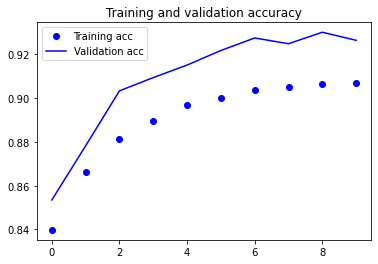

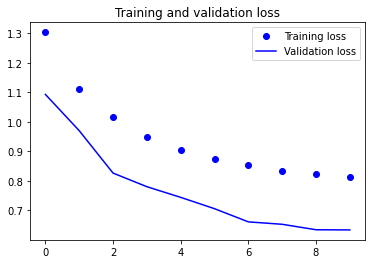

In [36]:
epochs = range(len(acc))

import matplotlib.pyplot as plt
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [37]:
test_generator = test_datagen.flow_from_directory(test_dir,
 target_size=(150, 150), batch_size=50, class_mode='categorical')

Found 1330 images belonging to 6 classes.


In [38]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=26)
print('test acc:', test_acc)

Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.9363332986831665


### model6: 사전 합성곱 기반 모형 확장 및 미세조정

In [39]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [40]:
conv_base.trainable = True

In [41]:
set_trainable = False 
for layer in conv_base.layers: 
    if layer.name == 'block5_conv1': 
        set_trainable = True 
    if set_trainable: 
        layer.trainable = True 
    else: 
        layer.trainable = False

In [42]:
from tensorflow.keras import optimizers 
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['accuracy'])

In [44]:
history = model.fit( 
    train_generator,
    steps_per_epoch=164,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=28,
    callbacks=my_callbacks,
    )

Epoch 1/10
164/164 [==============================] - 1323s 8s/step - loss: 0.7712 - accuracy: 0.9125 - val_loss: 0.5742 - val_accuracy: 0.9348
Epoch 2/10
164/164 [==============================] - 1353s 8s/step - loss: 0.6991 - accuracy: 0.9201 - val_loss: 0.5349 - val_accuracy: 0.9396
Epoch 3/10
164/164 [==============================] - 1337s 8s/step - loss: 0.6675 - accuracy: 0.9243 - val_loss: 0.5158 - val_accuracy: 0.9429
Epoch 4/10
164/164 [==============================] - 1340s 8s/step - loss: 0.6402 - accuracy: 0.9259 - val_loss: 0.4918 - val_accuracy: 0.9456
Epoch 5/10
164/164 [==============================] - 1331s 8s/step - loss: 0.6167 - accuracy: 0.9301 - val_loss: 0.4897 - val_accuracy: 0.9446
Epoch 6/10
164/164 [==============================] - 1338s 8s/step - loss: 0.5999 - accuracy: 0.9314 - val_loss: 0.4734 - val_accuracy: 0.9454
Epoch 7/10
164/164 [==============================] - 1340s 8s/step - loss: 0.5774 - accuracy: 0.9340 - val_loss: 0.4522 - val_accuracy:

In [45]:
model.save('animals_5.h5')

In [46]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

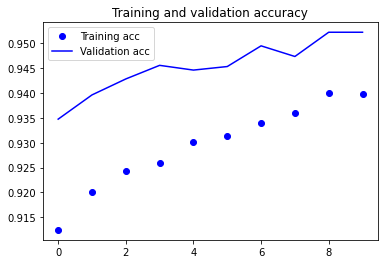

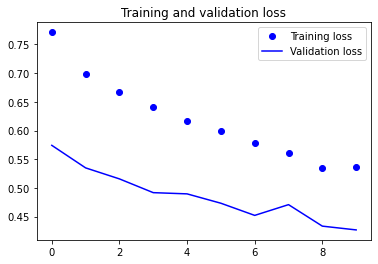

In [47]:
epochs = range(len(acc))

import matplotlib.pyplot as plt
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.show()

In [48]:
test_generator = test_datagen.flow_from_directory(test_dir,
 target_size=(150, 150), batch_size=50, class_mode='categorical')

Found 1330 images belonging to 6 classes.


In [50]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=26)
print('test acc:', test_acc)

test acc: 0.9532051086425781


### 최종 모델 선택

Model 6: VGG16이라는 합성곱층과 이를 확장한 모델에 동결을 해제하여 Block 5에 대해 미세 조정한 모델